In [45]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pylab as plt
import numpy
import librosa
import io

%matplotlib inline


## Example code to put matplotlib graph to Tensorboard X
https://discuss.pytorch.org/t/example-code-to-put-matplotlib-graph-to-tensorboard-x/15806

In [134]:
import io
import matplotlib.pyplot as plt
from tensorboardX import SummaryWriter
import PIL.Image
from torchvision.transforms import ToTensor


"""
    waveform : numpy array[9,n_sample]
"""
def plot_waveform(waveform, sample_rate=16000):
    num_channels = waveform.shape[0]
    num_frames = waveform.shape[1]
    time_axis = numpy.arange(start=0, stop=num_frames) / sample_rate

    figure, axes = plt.subplots(3, 4)
    
    gs = axes[0,0].get_gridspec()
    for ax in axes[0,:]:
        ax.remove()
    
    big = figure.add_subplot(gs[0,:])
    big.set_title('input')
    big.plot(time_axis, waveform[0], linewidth=1)
    
    
    for c in range(4):
        idx_y = 1
        idx_x = c
        
        axes[idx_y,idx_x].plot(time_axis, waveform[1+c], linewidth=1)
        axes[idx_y,idx_x].grid(True)
        axes[idx_y,idx_x].set_title(f'target {c}')
        
    for c in range(4):
        idx_y = 2
        idx_x = c
        
        axes[idx_y,idx_x].plot(time_axis, waveform[5+c], linewidth=1)
        axes[idx_y,idx_x].grid(True)
        axes[idx_y,idx_x].set_title(f'output {c}')
        
    figure.set_size_inches(15, 11)

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    
    buf.seek(0)
    
    image = PIL.Image.open(buf)
    image = ToTensor()(image).unsqueeze(0)
    return image

(16000,)
(9, 16000)


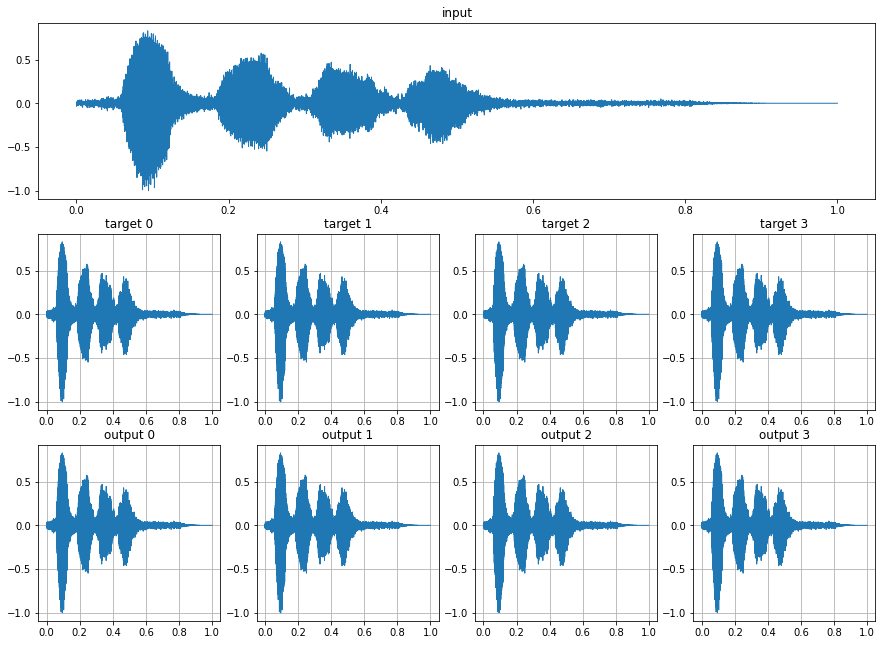

In [135]:
x,_ = librosa.load("39_0.wav",sr=16000)
print(x.shape)
x = np.tile(x,(9,1))
print(x.shape)

image = plot_waveform(x)